In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [10]:
X = pd.read_csv('Data\Training_set_features.csv')
y = pd.read_csv('Data\Training_set_labels.csv')


In [11]:
df=X.merge(y,on='respondent_id')

In [12]:
def explore_dataframe(df, name="DataFrame"): #user defined function to get the shape,info and description of the dataset
    print(f"\n===== {name} Overview =====")
    
    print("\nShape:")
    print(df.shape)
    
    print("\nInfo:")
    print("-" * 40)
    df.info()
    
    print("\nDescription:")
    print("-" * 40)
    print(df.describe(include='all'))
explore_dataframe(df,name='Predicting Vaccines')


===== Predicting Vaccines Overview =====

Shape:
(26707, 38)

Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal  

In [13]:


# Step 1: Drop high-missing features (> 40%)
missing = df.isnull().sum() / len(df) * 100
to_drop = missing[missing > 40].index.tolist()
df_reduced = df.drop(columns=to_drop)

# Step 2: Split features and target
target = 'h1n1_vaccine'
X = df_reduced.drop(columns=[target])
y = df_reduced[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Separate by data type
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 4: Impute missing values
# Categorical: fill with 'Missing'
X_train[categorical_cols] = X_train[categorical_cols].fillna('Missing')
X_test[categorical_cols] = X_test[categorical_cols].fillna('Missing')

# Numerical: fill with median
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_train[numerical_cols].median())

# Step 5: One-hot encode categorical
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_cat = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

# Step 6: Combine encoded and numeric features
X_train_final = pd.concat([X_train[numerical_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_cat], axis=1)

# Step 7: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test_final)
y_proba = model.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4212
           1       0.69      0.47      0.56      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.71      0.73      5342
weighted avg       0.83      0.84      0.83      5342

ROC AUC Score: 0.8614964408474733


In [14]:


# Step 1: Drop columns with > 40% missing
missing = df.isnull().sum() / len(df) * 100
drop_cols = missing[missing > 40].index.tolist()
df_reduced = df.drop(columns=drop_cols)

# Step 2: Define target
target = 'seasonal_vaccine'
X = df_reduced.drop(columns=[target])
y = df_reduced[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Identify types
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 4: Impute missing values
# Categorical → 'Missing'
X_train[categorical_cols] = X_train[categorical_cols].fillna('Missing')
X_test[categorical_cols] = X_test[categorical_cols].fillna('Missing')

# Numerical → median
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_train[numerical_cols].median())

# Step 5: One-hot encode
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_cat = pd.DataFrame(
    encoder.fit_transform(X_train[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    encoder.transform(X_test[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test.index
)

# Step 6: Combine numerical + encoded categorical
X_train_final = pd.concat([X_train[numerical_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_cat], axis=1)

# Step 7: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test_final)
y_proba = model.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2891
           1       0.75      0.73      0.74      2451

    accuracy                           0.76      5342
   macro avg       0.76      0.76      0.76      5342
weighted avg       0.76      0.76      0.76      5342

ROC AUC Score: 0.8310509648748823


Classification Report:

              precision    recall  f1-score   support

        H1N1       0.67      0.22      0.33       200
    Seasonal       0.91      0.99      0.94      1543

    accuracy                           0.90      1743
   macro avg       0.79      0.60      0.64      1743
weighted avg       0.88      0.90      0.87      1743



c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


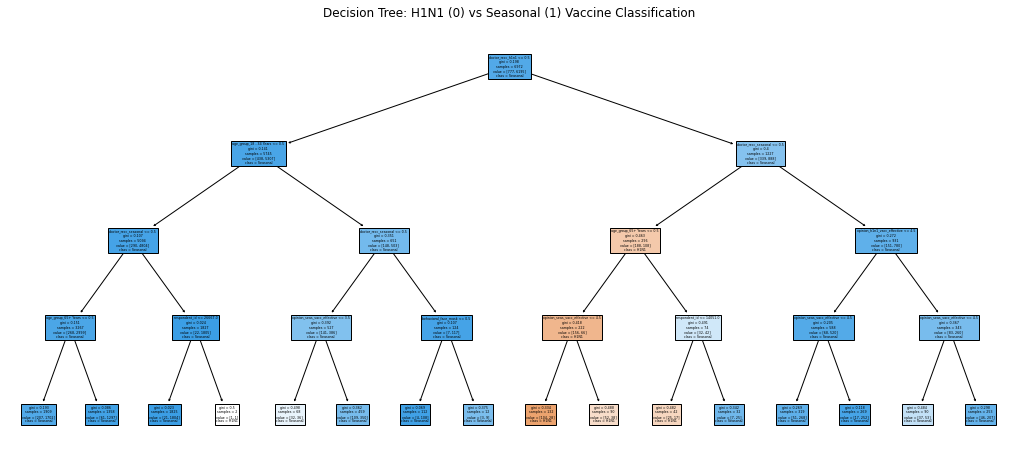

In [15]:


# Step 1: Filter rows where only one vaccine was taken
df_filtered = df[(df['h1n1_vaccine'] != df['seasonal_vaccine'])].copy()

# Step 2: Create combined target
df_filtered['vaccine_type'] = df_filtered['seasonal_vaccine']  # 1 = seasonal, 0 = h1n1

# Drop original vaccine columns
df_filtered = df_filtered.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])

# Step 3: Drop columns with > 40% missing data
missing = df_filtered.isnull().sum() / len(df_filtered) * 100
drop_cols = missing[missing > 40].index.tolist()
df_filtered = df_filtered.drop(columns=drop_cols)

# Step 4: Prepare features and target
target = 'vaccine_type'
X = df_filtered.drop(columns=[target])
y = df_filtered[target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 5: Impute missing values
X_train[cat_cols] = X_train[cat_cols].fillna('Missing')
X_test[cat_cols] = X_test[cat_cols].fillna('Missing')
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].median())

# Step 6: One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]),
                           columns=encoder.get_feature_names_out(cat_cols),
                           index=X_train.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols),
                          index=X_test.index)

# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train[num_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[num_cols], X_test_cat], axis=1)

# Step 7: Train the decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train_final, y_train)

# Step 8: Predict on test set
y_pred = tree.predict(X_test_final)

# Step 9: Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['H1N1', 'Seasonal']))

# Step 10: Plot the tree
plt.figure(figsize=(18, 8))
plot_tree(tree, feature_names=X_train_final.columns, class_names=['H1N1', 'Seasonal'], filled=True)
plt.title('Decision Tree: H1N1 (0) vs Seasonal (1) Vaccine Classification')
plt.show()


c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classification Report with class_weight='balanced':

              precision    recall  f1-score   support

        H1N1       0.31      0.60      0.41       200
    Seasonal       0.94      0.83      0.88      1543

    accuracy                           0.80      1743
   macro avg       0.63      0.72      0.65      1743
weighted avg       0.87      0.80      0.83      1743



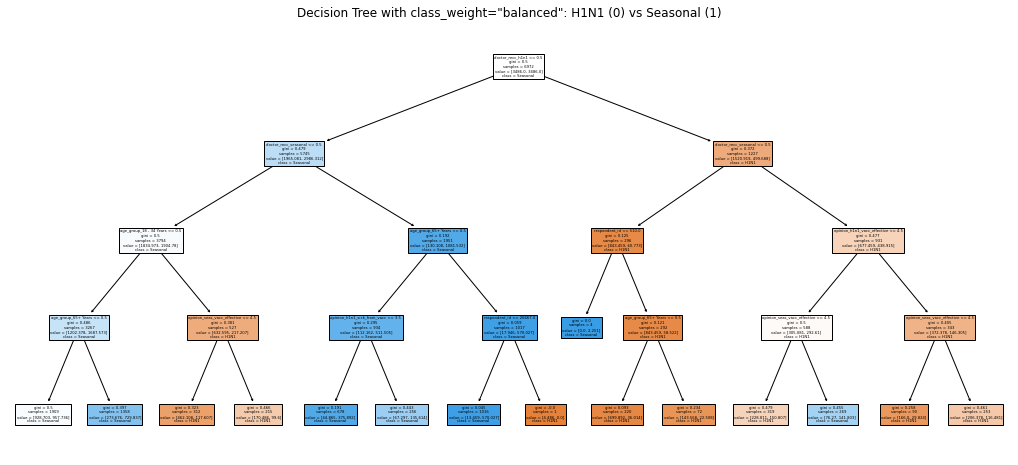

In [16]:


# Step 1: Filter rows where only one vaccine was taken
df_filtered = df[(df['h1n1_vaccine'] != df['seasonal_vaccine'])].copy()

# Step 2: Create combined target
df_filtered['vaccine_type'] = df_filtered['seasonal_vaccine']  # 1 = seasonal, 0 = h1n1

# Drop original vaccine columns
df_filtered = df_filtered.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])

# Step 3: Drop columns with > 40% missing data
missing = df_filtered.isnull().sum() / len(df_filtered) * 100
drop_cols = missing[missing > 40].index.tolist()
df_filtered = df_filtered.drop(columns=drop_cols)

# Step 4: Prepare features and target
target = 'vaccine_type'
X = df_filtered.drop(columns=[target])
y = df_filtered[target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 5: Impute missing values
X_train[cat_cols] = X_train[cat_cols].fillna('Missing')
X_test[cat_cols] = X_test[cat_cols].fillna('Missing')
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].median())

# Step 6: One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]),
                           columns=encoder.get_feature_names_out(cat_cols),
                           index=X_train.index)
X_test_cat = pd.DataFrame(encoder.transform(X_test[cat_cols]),
                          columns=encoder.get_feature_names_out(cat_cols),
                          index=X_test.index)

# Combine numerical and encoded categorical features
X_train_final = pd.concat([X_train[num_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[num_cols], X_test_cat], axis=1)

# Step 7: Train the decision tree with balanced class weights
tree_balanced = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
tree_balanced.fit(X_train_final, y_train)

# Step 8: Predict on test set
y_pred_balanced = tree_balanced.predict(X_test_final)

# Step 9: Classification report
print("Classification Report with class_weight='balanced':\n")
print(classification_report(y_test, y_pred_balanced, target_names=['H1N1', 'Seasonal']))

# Step 10: Plot the balanced tree
plt.figure(figsize=(18, 8))
plot_tree(tree_balanced, feature_names=X_train_final.columns, class_names=['H1N1', 'Seasonal'], filled=True)
plt.title('Decision Tree with class_weight="balanced": H1N1 (0) vs Seasonal (1)')
plt.show()


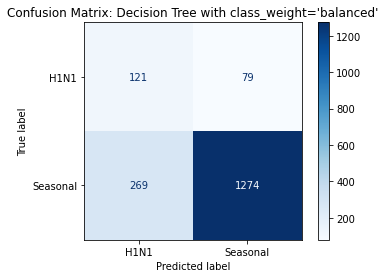

In [17]:


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)

# Plot confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['H1N1', 'Seasonal'])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix: Decision Tree with class_weight='balanced'")
plt.show()


True Positives (TP = 1274): Model correctly predicted "Yes" when the actual was "Yes".

True Negatives (TN = 121): Model correctly predicted "No" when the actual was "No".

False Positives (FP = 79): Model predicted "Yes", but the actual was "No".

False Negatives (FN = 269): Model predicted "No", but the actual was "Yes".